In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pso_df = pd.read_excel("C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\pso_results\\pso_full.xlsx")
ga_df = pd.read_excel("C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\ga_results\\ga_full.xlsx")

In [3]:
def excelListCleanup(inputDfRow):
    toClean = inputDfRow
    toRemove=['[',']','\n'] 
    for i in toRemove:
        toClean = toClean.replace(i,'')
    toClean = toClean.split(' ')
    toClean = [i for i in toClean if i!='']
    toClean = [float(i)for i in toClean]
    #print(toClean)
    return toClean
#params_df.iat[65, params_df.columns.get_loc('costVal_list')]
#print(excelListCleanup(params_df.iat[65, params_df.columns.get_loc('costVal_list')]))

In [4]:
pso_df.costVal_list = pso_df.costVal_list.apply(lambda x : excelListCleanup(x))
pso_df.feasibility_list = pso_df.feasibility_list.apply(lambda x : excelListCleanup(x))
pso_df.lastHit_list = pso_df.lastHit_list.apply(lambda x : excelListCleanup(x))

ga_df.costVal_list = ga_df.costVal_list.apply(lambda x : excelListCleanup(x))
ga_df.feasibility_list = ga_df.feasibility_list.apply(lambda x : excelListCleanup(x))
ga_df.lastHit_list = ga_df.lastHit_list.apply(lambda x : excelListCleanup(x))

In [5]:
best_pso = pso_df[(pso_df['nb_r'] == 5) & (pso_df['N'] == 200)]

In [6]:
#best_pso.costVal_list.values[0]

[402.59315409,
 415.16761516,
 427.70926795,
 386.88517273,
 429.63491767,
 393.83486762,
 398.46578942,
 428.59824981,
 408.35834041,
 422.74687992,
 417.27013931,
 420.83424791,
 398.79554855,
 420.87112517,
 401.9245135,
 413.67338275,
 405.71539575,
 414.98426119,
 411.96403227,
 410.11885318,
 366.56545971,
 416.68031571,
 415.87844953,
 417.44302654,
 411.46048613]

In [9]:
best_ga = ga_df[(ga_df['select_op'] == 25) & (ga_df['N'] == 200)]

In [10]:
#best_ga.costVal_list.values[0]

array([list([358.36788267, 379.44508579, 389.93917925, 367.48452851, 428.32776548, 395.38502917, 358.43725974, 363.4108397, 379.4444819, 383.40840955, 368.29484412, 358.36788143, 379.1854567, 379.44844162, 358.43729343, 408.00355445, 399.46407529, 401.50663438, 358.43726437, 379.36123772, 416.50262046, 442.69931339, 409.33986909, 358.43726268, 358.43727573])],
      dtype=object)

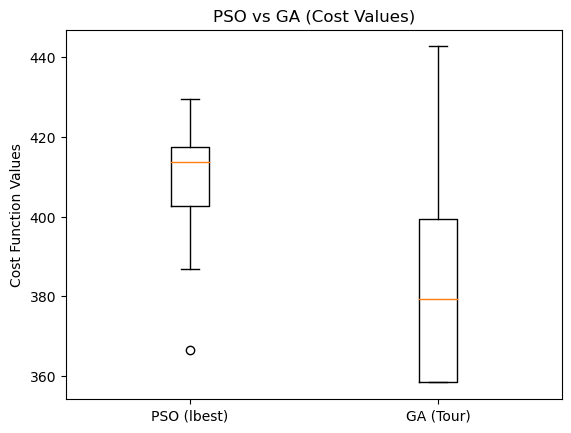

In [11]:
import matplotlib.pyplot as plt
data = [best_pso.costVal_list.values[0],best_ga.costVal_list.values[0]] 

# Creating a boxplot
plt.boxplot(data, labels=['PSO (lbest)', 'GA (Tour)'])
plt.title('PSO vs GA (Cost Values)')
plt.ylabel('Cost Function Values')

# Show the plot
#plt.show()
plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\ga_vs_pso\\'+'ga_vs_pso_cv_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')

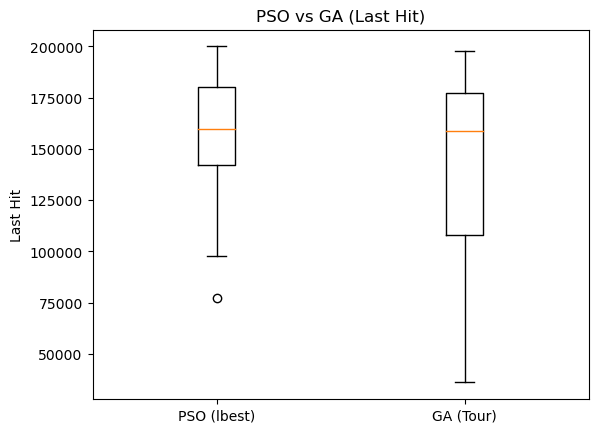

In [12]:
data = [best_pso.lastHit_list.values[0],best_ga.lastHit_list.values[0]] 

# Creating a boxplot
plt.boxplot(data, labels=['PSO (lbest)', 'GA (Tour)'])
plt.title('PSO vs GA (Last Hit)')
plt.ylabel('Last Hit')

# Show the plot
#plt.show()
plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\ga_vs_pso\\'+'ga_vs_pso_lh_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')